In [20]:
%matplotlib inline

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [22]:
super = pd.read_csv("Super C19.csv")
super = super.drop('Unnamed: 0', axis = 1)

#Creating cases and deaths columns to later get accruate new cases and deaths
for i in range(3142):
    column_data = 0

super.insert(4, "2020-01-21,1cases", column_data)
super.insert(1096, "2020-01-21,2deaths", column_data)

In [23]:
USData = super.drop(super.columns[[0, 1, 2, 3, -1]], axis=1).sum()

In [24]:
US_Cases = []
US_Deaths = []
for i in range(len(USData.keys())):
    if str(USData.keys()[i][11:13]) != "2d":
        US_Cases.append(USData[i])
    else:
        US_Deaths.append(USData[i])

# print(US_Cases)
# print(US_Deaths)

#Getting the new cases and deaths
NewUS_Cases = []
for i in reversed(range(len(US_Cases))):
    UNC = US_Cases[i] - US_Cases[i - 1]
    if (UNC < 0):
        UNC = 0
    NewUS_Cases.insert(0, UNC)

NewUS_Deaths = []
for i in reversed(range(len(US_Deaths))):
    UND = US_Deaths[i] - US_Deaths[i - 1]
    if (UND < 0):
        UND = 0
    NewUS_Deaths.insert(0, UND)

NewUS_Cases.pop(0)
NewUS_Deaths.pop(0)

0

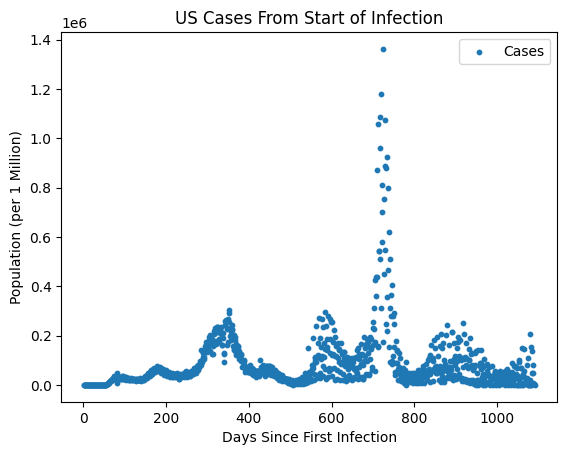

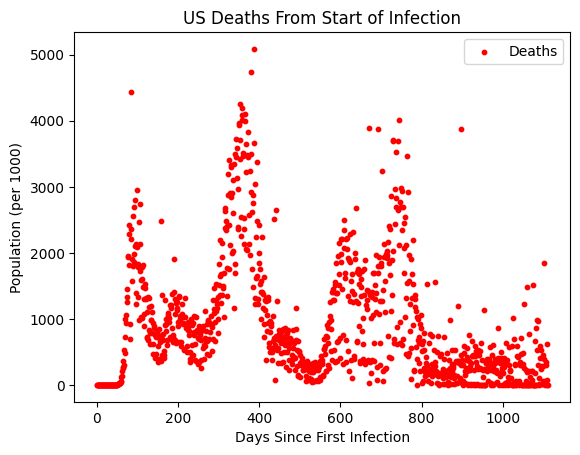

In [25]:
case_data = []
for i in range(len(NewUS_Cases)):
    i += 1
    day_data = i
    case_data.append(day_data)

death_data = []
for i in range(len(NewUS_Deaths)):
    i += 1
    day_data = i
    death_data.append(day_data)

NewUS_Cases = np.array(NewUS_Cases)
NewUS_Deaths = np.array(NewUS_Deaths)
case_data = np.array(case_data)
death_data = np.array(death_data)

plt.scatter(case_data, NewUS_Cases, label='Cases', s = 10)
plt.legend()
plt.title("US Cases From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1 Million)")
plt.show()

plt.scatter(death_data, NewUS_Deaths, label='Deaths', c ="red", s = 10)
plt.legend()
plt.title("US Deaths From Start of Infection")
plt.xlabel("Days Since First Infection")
plt.ylabel("Population (per 1000)")
plt.show()

Linear Regression Models

Text(0.5, 1.0, 'U.S. Cases Mean Squared Error: 1.64e+10')

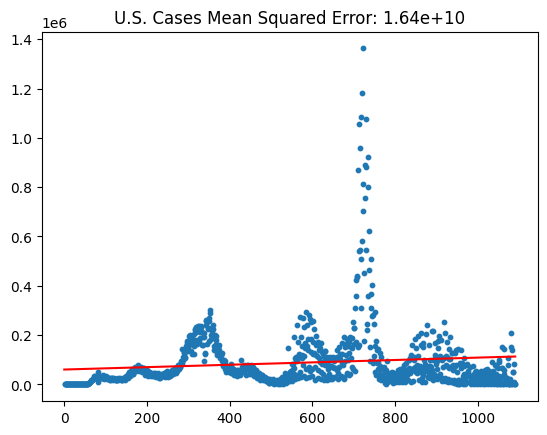

In [26]:
xCases = case_data.reshape((-1, 1))
yCases = NewUS_Cases

model = LinearRegression().fit(xCases, yCases)
y_pred = model.predict(xCases)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test.ravel(), y_pred, c ="red")
plt.title("U.S. Cases Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(xCases), yCases)))

Text(0.5, 1.0, 'U.S. Deaths Mean Squared Error: 7.99e+05')

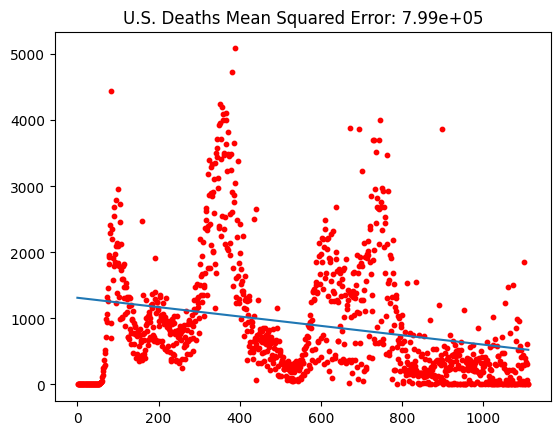

In [27]:
xDeaths = death_data.reshape((-1, 1))
yDeaths = NewUS_Deaths

model = LinearRegression().fit(xDeaths, yDeaths)
y_pred = model.predict(xDeaths)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test.ravel(), y_pred)
plt.title("U.S. Deaths Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(xDeaths), yDeaths)))

Non-Linear (Polynomial) Regression Models

Text(0.5, 1.0, 'US Cases Mean Squared Error: 1.5e+10')

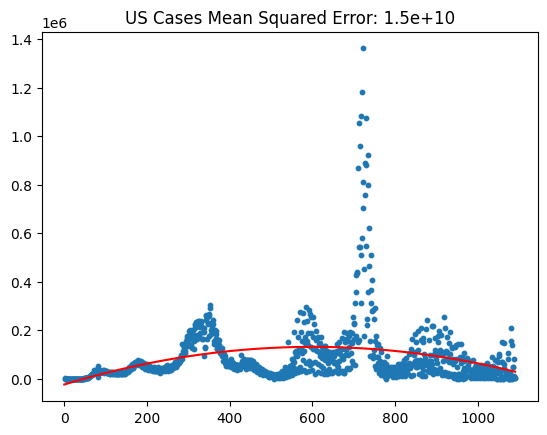

In [28]:
xCases = case_data.reshape((-1, 1))
yCases = NewUS_Cases

nonlin = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xCases)
model = LinearRegression().fit(nonlin, yCases)

y_pred = model.predict(nonlin)
x_test = np.linspace(0, 1091, 1091)[:, None]

plt.scatter(xCases.ravel(), yCases, s = 10)
plt.plot(x_test.ravel(), y_pred, c ="red")
plt.title("US Cases Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(nonlin), yCases)))

Text(0.5, 1.0, 'US Deaths Mean Squared Error: 6.99e+05')

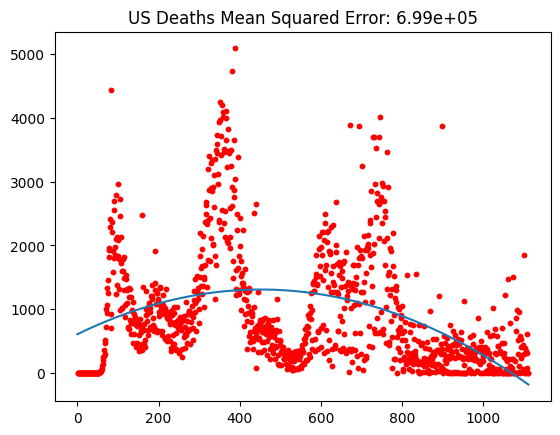

In [29]:
xDeaths = death_data.reshape((-1, 1))
yDeaths = NewUS_Deaths

nonlin = PolynomialFeatures(degree=2, include_bias=False).fit_transform(xDeaths)
model = LinearRegression().fit(nonlin, yDeaths)

y_pred = model.predict(nonlin)
x_test = np.linspace(0, 1111, 1111)[:, None]

plt.scatter(xDeaths.ravel(), yDeaths, c ="red", s = 10)
plt.plot(x_test.ravel(), y_pred)
plt.title("US Deaths Mean Squared Error: {0:.3g}".format(mean_squared_error(model.predict(nonlin), yDeaths)))